# Analyse GANN training

## Init

Load libraries

In [1]:
library(dplyr)
library(Seurat)
library(patchwork)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
#sessionInfo()
#reticulate::py_install(packages = 'umap-learn')

Set paths

In [3]:
paths.train_nonorm_path <- "../data/tpm_combined_train_nonorm.csv"
paths.test_nonorm_path <- "../data/tpm_combined_test_nonorm.csv"
paths.gen_1_path <- "../data/gen_prof_30.csv"

## Load and visualise

Load unnormalised training data

In [4]:
train_nonorm_raw <- read.table(file=paths.train_nonorm_path, sep=",", row.names = 1, header=TRUE)
head(train_nonorm_raw)

,P1.3.A10,P1.3.A11,P1.3.A12,P1.3.A2,P1.3.A4,P1.3.A5,P1.3.A6,P1.3.A7,P1.3.A8,P1.3.B3,⋯,GHA501A85,GHA501A86,GHA501A88,GHA501A89,GHA501A90,GHA501A94,GHA501A95,GHA501A98,GHA501A99,GHA501A9
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Rfc3,0.000000,0.000000,0.000000,0.000000,0.000000,3.051372,5.617063,0.000000,0.0000000,3.526069,⋯,7.7553921,1.241720,6.2614044,6.480059,4.7291586,6.4899840,1.092268,3.6619208,3.921598,0.000000
Cd47,6.033863,5.564378,4.365972,6.768714,5.736875,4.075533,6.556276,4.442280,4.7147950,5.123914,⋯,8.8863576,9.001691,8.5115705,7.932110,7.6587774,6.0236338,10.458879,7.5448340,8.581246,9.770376
Elmo2,5.838195,0.000000,5.755422,7.441948,5.530757,6.876149,6.384568,7.330200,6.6519127,5.215679,⋯,6.7044797,5.044924,5.3982323,2.299830,0.7719891,1.2724215,2.308829,2.1354247,6.343773,3.824600
Crip2,3.327687,7.560868,0.000000,6.962318,5.048759,5.891905,0.000000,0.000000,4.4289463,4.556429,⋯,0.0000000,0.000000,0.0000000,0.000000,0.0000000,0.0000000,0.000000,0.0000000,0.000000,0.000000
Pprc1,5.766860,0.000000,5.279471,4.466627,4.186659,2.851999,2.272023,5.751410,0.8318772,5.511595,⋯,3.8067596,0.000000,1.0618995,4.385497,1.6626486,0.0000000,0.000000,0.7437538,2.725903,1.069900
Ccdc174,1.372952,0.000000,0.000000,5.659925,2.981853,0.000000,0.000000,1.879706,0.0000000,1.589763,⋯,0.3346734,4.237288,0.5734587,5.510105,2.3899220,0.9136959,5.156094,2.6889399,1.939234,6.256904


Load unnormalised test data

In [5]:
test_nonorm_raw <- read.table(file=paths.test_nonorm_path, sep=",", row.names = 1, header=TRUE)
head(test_nonorm_raw)

,P1.3.A3,P1.3.B10,P1.3.B12,P1.3.B2,P1.3.B8,P1.3.D1,P1.3.D12,P1.3.D9,P1.3.E1,P1.3.E4,⋯,GHA501A41,GHA501A47,GHA501A48,GHA501A54,GHA501A69,GHA501A70,GHA501A72,GHA501A74,GHA501A83,GHA501A93
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Rfc3,0.000000,0.000000,4.703765,0.000000,0.000000,5.227279,4.800641,0.0000000,0.0000000,0.000000,⋯,0.5448804,0.7823517,0.6369969,2.175254,0.000000,1.7801001,3.801378,0.7655439,0.000000,3.4088070
Cd47,0.000000,3.196922,5.099716,2.918386,5.226123,0.000000,3.658783,3.0373822,0.0000000,7.142720,⋯,2.7807633,8.4777158,9.2550843,8.408633,6.871060,9.2950091,4.947373,8.5891534,9.918273,9.7571295
Elmo2,8.091382,5.988912,6.964745,4.581351,6.436295,4.409391,4.185867,4.3490821,0.3561438,7.410918,⋯,5.6864396,0.7812074,0.0000000,2.647312,0.000000,0.5416181,0.000000,3.9701527,2.691955,1.6911530
Crip2,7.533408,0.000000,3.824768,0.000000,0.000000,0.000000,0.000000,5.8872816,3.7516779,0.000000,⋯,8.1795533,0.0000000,0.0000000,0.000000,0.000000,0.0000000,0.000000,0.9078236,0.000000,0.0000000
Pprc1,0.000000,2.914565,4.851999,5.107269,3.198494,4.257765,5.157044,0.0000000,0.4114262,3.766595,⋯,0.3990446,2.5846768,0.0000000,3.723433,4.377274,0.2765536,3.884531,0.3138547,0.000000,0.5628152
Ccdc174,0.000000,2.704872,2.817623,3.266037,4.399855,4.531693,3.204767,0.6322682,1.7355222,0.000000,⋯,1.4413852,1.7464567,1.0269647,4.373164,4.417183,5.3613503,0.000000,0.0000000,5.389610,1.6996514


Load gen prof-1

In [6]:
genprof_1_raw <- read.table(file=paths.gen_1_path, sep=",", row.names = 1, header=TRUE)
head(genprof_1_raw)

,gencell_ep30_0,gencell_ep30_1,gencell_ep30_2,gencell_ep30_3,gencell_ep30_4,gencell_ep30_5,gencell_ep30_6,gencell_ep30_7,gencell_ep30_8,gencell_ep30_9,⋯,gencell_ep30_490,gencell_ep30_491,gencell_ep30_492,gencell_ep30_493,gencell_ep30_494,gencell_ep30_495,gencell_ep30_496,gencell_ep30_497,gencell_ep30_498,gencell_ep30_499
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Rfc3,3.739872,6.197376,6.029748,4.701440,5.061384,7.504624,4.330666,6.124937,5.430233,6.263113,⋯,5.707122,5.869887,6.297833,6.312262,5.831656,5.008479,4.495159,6.214203,5.163877,4.485219
Cd47,9.287079,9.472474,7.625455,6.769899,9.463817,7.744891,9.843395,9.686544,10.640999,8.437771,⋯,7.727530,9.647658,9.048847,7.635018,8.101591,8.658295,9.451842,8.559347,8.926496,9.378535
Elmo2,4.649498,5.267968,5.370338,6.005471,4.482420,5.154839,5.395738,4.931273,4.898510,4.450710,⋯,4.101466,5.356812,5.372474,4.516852,4.634132,4.023563,6.129064,4.454948,4.685174,3.622474
Crip2,6.525054,5.643853,6.199001,5.390991,4.952252,5.467213,6.163204,5.368984,6.332649,3.582950,⋯,4.591341,3.292984,6.924797,4.864324,5.459675,5.327998,6.179699,4.579102,6.562734,5.209159
Pprc1,8.451284,8.819451,8.977239,9.402481,9.564436,8.045833,9.870139,8.543461,8.464774,8.320326,⋯,7.313076,8.769963,9.386379,8.445296,8.707259,8.544514,8.831827,6.789115,8.568836,8.417147
Ccdc174,4.687336,3.308001,3.513555,5.255967,3.684366,3.825512,4.164187,3.442027,3.990328,2.770782,⋯,3.750702,3.305492,4.409565,4.153620,4.489728,4.537242,3.357530,3.411374,4.637113,2.898540


Create Seurat objects

In [7]:
train_nonorm <- CreateSeuratObject(counts = train_nonorm_raw, project="wgan_train")
train_nonorm

An object of class Seurat 
6807 features across 1798 samples within 1 assay 
Active assay: RNA (6807 features, 0 variable features)

In [8]:
test_nonorm <- CreateSeuratObject(counts = test_nonorm_raw, project="wgan_test")
test_nonorm

An object of class Seurat 
6807 features across 500 samples within 1 assay 
Active assay: RNA (6807 features, 0 variable features)

In [9]:
gen_prof_1 <- CreateSeuratObject(counts = genprof_1_raw, project="gen_prof_1")
gen_prof_1

An object of class Seurat 
6807 features across 500 samples within 1 assay 
Active assay: RNA (6807 features, 0 variable features)

Merge together

In [10]:
data_combined <- merge(train_nonorm, y = list(test_nonorm, gen_prof_1), add.cell.ids = c("Train", "Test", "Gen1"), project = "wgan")
data_combined

An object of class Seurat 
6807 features across 2798 samples within 1 assay 
Active assay: RNA (6807 features, 0 variable features)

In [11]:
table(data_combined$orig.ident)


   gencell  wgan_test wgan_train 
       500        500       1798 

## Perform QC

In [12]:
# Look at some canonical marker genes and metrics
#VlnPlot(train_nonorm,c("ENSMUSG00000000001","ENSMUSG00000000056","ENSMUSG00000000058","ENSMUSG00000000078"))

## Normalise and scale data

In [13]:
data_combined <- NormalizeData(data_combined)

In [14]:
data_combined <- FindVariableFeatures(data_combined, selection.method = "vst", nfeatures = 2000)

In [15]:
all.genes <- rownames(data_combined)
data_combined <- ScaleData(object = data_combined, features = all.genes)

Centering and scaling data matrix



## Dim reduction

In [16]:
data_combined <- RunPCA(object = data_combined, features = VariableFeatures(object = data_combined))

PC_ 1 
Positive:  Rplp1, Rps29, Rpl4, Perp, B2m, Hspb1, Lgals7, Rpl32, Anxa2, Fam25c 
	   Fau, Dmkn, Sfn, S100a11, Tmsb4x, Apoe, Mif, Sbsn, Krt10, Fos 
	   Rpl19, Klf4, Krtdap, Rps12, Calm4, Anxa8, Krt15, Rps26, Dsg1a, Krt5 
Negative:  Phkg1, Cybrd1, Vmn1r58, Slfn9, Psg16, Slc4a7, Spag5, Sgip1, Rab7, Zan 
	   Spc24, Agbl5, Specc1, Zfp12, E030030I06Rik, Dock7, Nme4, R3hdm1, Farp2, Dcdc2c 
	   Slc35a3, Tonsl, Parva, Birc5, Cep170, Agps, Tpgs2, Sirt6, Rad1, Basp1 
PC_ 2 
Positive:  Rab31, Eno1, Pdpn, Gatad1, Atad2, Cand2, Fstl1, Dynlt1b, Pex1, Tnfrsf10b 
	   Gpr137b, Cpsf6, Sod1, Twf1, Fn1, Tmem126a, Vmp1, Yeats4, Fkbp3, Decr2 
	   Gja1, Timmdc1, Lamb1, Cct2, Ccdc84, Pola2, Rps7, Zfhx3, Ppic, Tspan3 
Negative:  Dsc3, Cebpa, Sbsn, Skint3, Ly6g6c, Chl1, Dsg1a, Spint2, Dapl1, Dmkn 
	   Alox12e, Ankrd35, Ly6g6e, Dsg1b, Klk7, Gdpd2, Gas6, Mboat2, Rab11fip1, Ly6d 
	   Bbox1, Itpkc, Capns2, Krt79, Krtdap, Tmprss4, Calml3, Il1rn, Calm4, Lrrc1 
PC_ 3 
Positive:  Nupr1, Acer1, Klk8, Crabp2, Ly6d, S

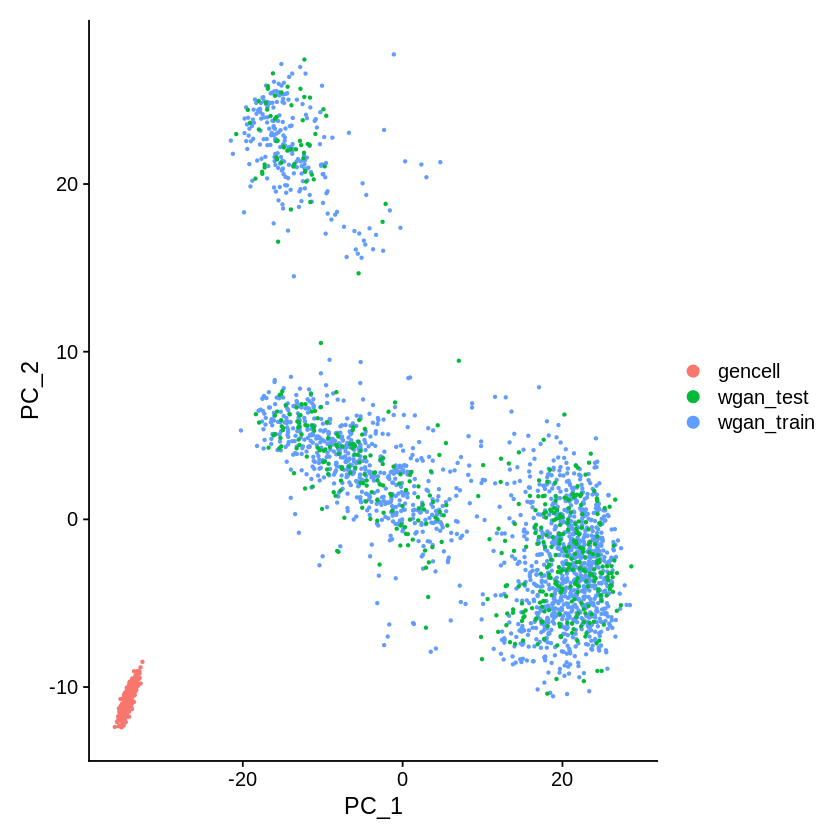

In [17]:
DimPlot(data_combined, reduction = "pca")

In [20]:
data_combined <- RunTSNE(object = data_combined, dims = 3:10)

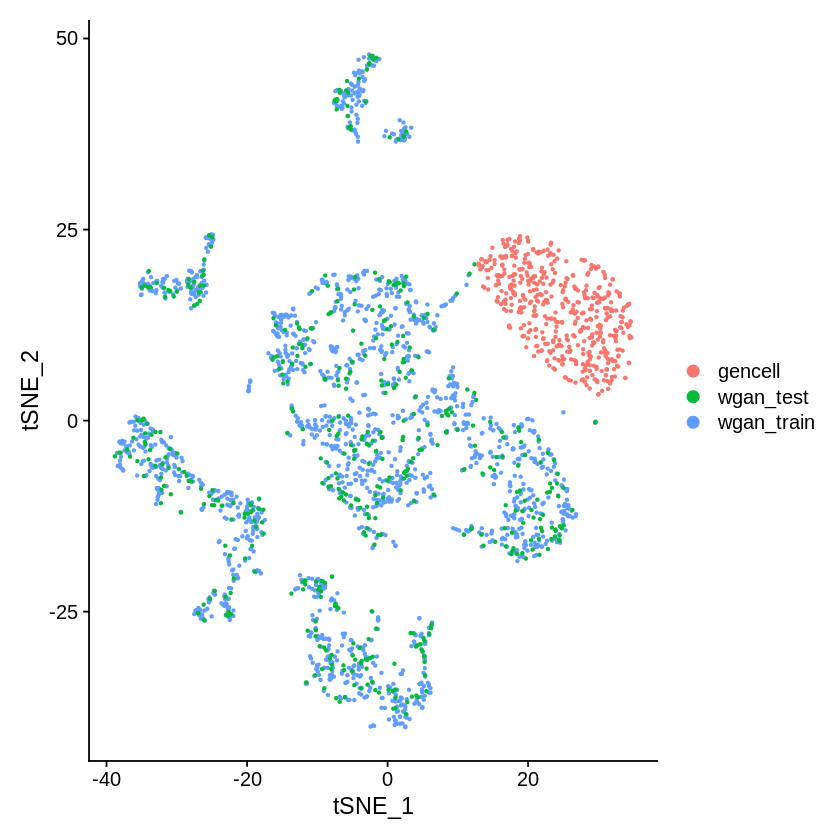

In [21]:
DimPlot(data_combined, reduction = "tsne")